In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load player stats
We'll be trying to model players' position as a function of their heigh and weight.
For those unfamiliar with basketball, there are typically five positions which correspond to where players are positioned on the court and the roles they play during offense and defense.
- PG (Point Guard)
- SG (Shooting Guard)
- SF (Small Forward)
- PF (Power Forward)
- C (Center)



In [2]:
class_data_url='/content/Soccer Dataset.csv'
df_frame = pd.read_csv('World Bank Data.csv')
df_frame.index += 1
df_frame.head()

NameError: name 'pd' is not defined

In [11]:
# prompt: list all the features

features = list(df_frame.columns)
for feature in features:
  print(feature)


Time
Country
Access to clean fuels and technologies for cooking
GDP per capita (constant 2015 US$)
Life expectancy at birth, total (years) 
Literacy rate, adult total
Access to electricity
Employment to population ratio, 15+
CO2 emissions 
Mobile cellular subscriptions 
Poverty headcount ratio at $2.15 a day 


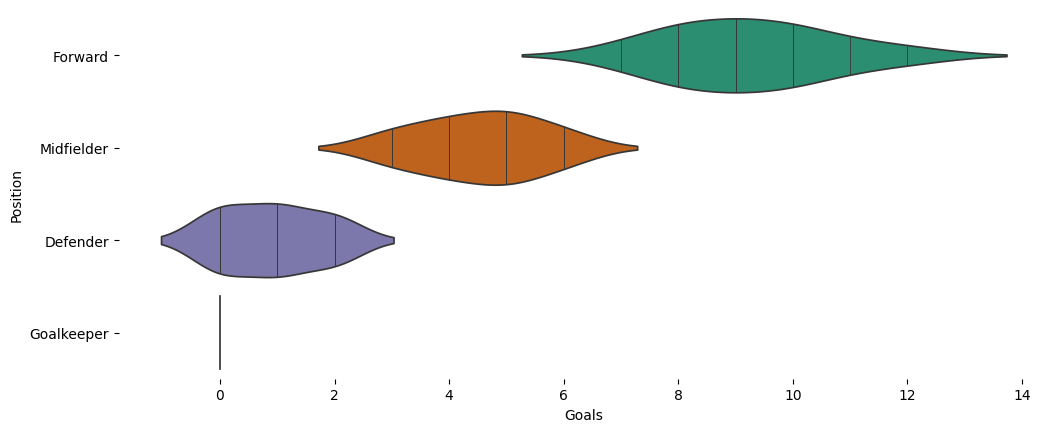

In [165]:
# @title position vs height

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_frame['Position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_frame, x='Goals', y='Position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

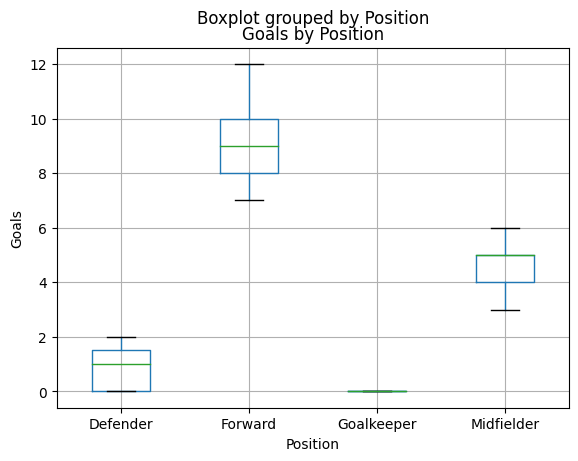

In [166]:
# @title Height by Position

import matplotlib.pyplot as plt
df_frame.boxplot(column='Goals', by='Position')
plt.xlabel('Position')
plt.ylabel('Goals')
_ = plt.title('Goals by Position')

In [ ]:
# prompt: generate scatter plot

df_frame.plot.scatter(x='Mobile Cellular Plan Subscription ', y='CO2 Emissions')
plt.show()

<Axes: xlabel='Shots', ylabel='Goals'>

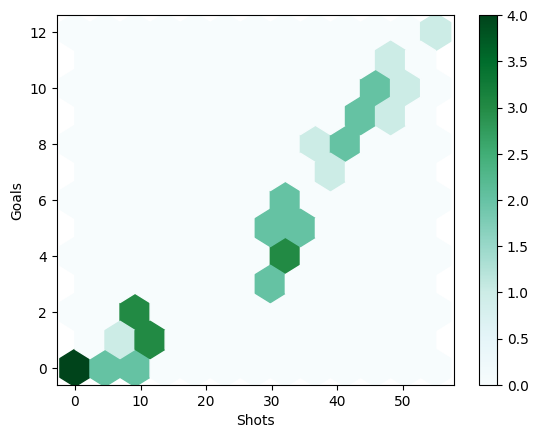

In [168]:
df_frame.plot(x='Shots',y='Goals', kind='hexbin', gridsize=12)

In [169]:
alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),
    color='Position'
)

alt.Chart(...)

In [171]:
# prompt: generate R Square and P Value score for the above chart

import statsmodels.api as sm

# Get the dependent and independent variables
y = df_frame['Goals']
X = df_frame[['Shots']]

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the R-squared and p-value
print(f"R-squared: {model.rsquared:.4f}")
print(f"P-value: {model.pvalues[1]:.4f}")


R-squared: 0.9312
P-value: 0.0000


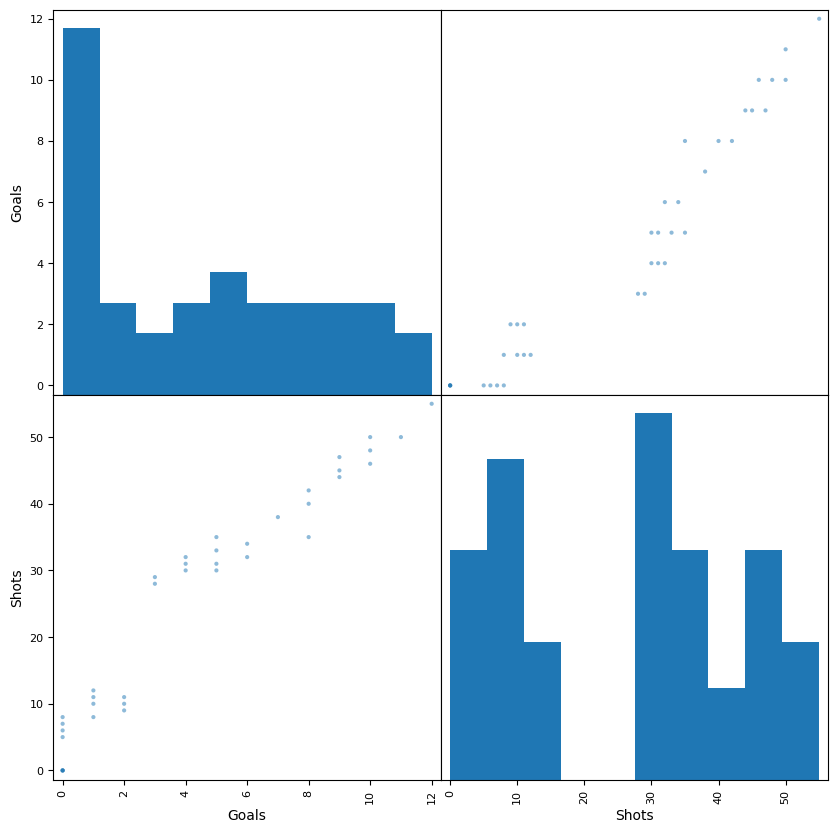

In [172]:
# prompt: plot scatter matrix excluding index

pd.plotting.scatter_matrix(df_frame[['Goals', 'Shots', 'Position']], figsize=(10, 10), diagonal='hist')
plt.show()


**Load Libraries for PCA**

In [ ]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

# K-Means
(A reminder of what clustering looks like for this data.)

In [1]:
df_hw_frame = df_frame[['CO2 emissions', 'Mobile cellular subscriptions']]
df_hw_frame.head()

NameError: name 'df_frame' is not defined

In [177]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
df_hw_standardized = scaler.fit_transform(df_hw_frame)
df_hw_standardized = pd.DataFrame(df_hw_standardized)
df_hw_standardized.columns = [df_hw_frame[:0]]
df_hw_standardized.head()

,Goals,Shots
0,1.467869,1.417247
1,-0.133443,0.243927
2,-0.934098,-0.929393
3,-1.200984,-1.516053
4,0.934098,0.830587


**Run PCA on the feature set dataframe**

In [178]:
# prompt: Generate principal components for table above

pca = decomposition.PCA(n_components=2)
df_hw_pca = pca.fit_transform(df_hw_standardized)
df_hw_pca = pd.DataFrame(df_hw_pca)
df_hw_pca.columns = ['PC1', 'PC2']
df_hw_pca.head()


,PC1,PC2
0,2.040085,-0.035795
1,0.078124,0.266841
2,-1.317687,0.003327
3,-1.921235,-0.222788
4,1.247821,-0.073193


In [179]:
# prompt: load all pca score with column names

pca_columns = ['PC' + str(i) for i in range(1, len(df_hw_pca.columns) + 1)]
df_hw_pca.columns = pca_columns
df_hw_pca.head()


,PC1,PC2
0,2.040085,-0.035795
1,0.078124,0.266841
2,-1.317687,0.003327
3,-1.921235,-0.222788
4,1.247821,-0.073193


**Explained variance for each PC**

In [180]:
# prompt: generate the explain variance for the table above

pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)


     Explained Variance
PC1            0.982486
PC2            0.017514


In [181]:
import numpy as np
import plotly.express as px

In [182]:
print(pca_variances)

     Explained Variance
PC1            0.982486
PC2            0.017514


In [183]:
# prompt: generate cumulative variance and explained variance

df_hw_pca['Cumulative Variance'] = df_hw_pca['PC1'] + df_hw_pca['PC2']
df_hw_pca.head()

pca_variances['Cumulative Variance'] = pca_variances['Explained Variance'].cumsum()
pca_variances.head()


,Explained Variance,Cumulative Variance
PC1,0.982486,0.982486
PC2,0.017514,1.000000


In [4]:
# prompt: plot the table above

fig = px.bar(pca_variances, x=pca_columns, y='Explained Variance', title='Explained Variance by PC',
             labels={'Explained Variance': 'Explained Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
fig = px.bar(pca_variances, x=pca_columns, y='Cumulative Variance', title='Cumulative Variance by PC',
             labels={'Cumulative Variance': 'Cumulative Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()


NameError: name 'px' is not defined

# prompt: explain the chart above for easy understanding

The chart above shows the explained variance by each principal component (PC). The explained variance is the proportion of the total variance in the data that is explained by each PC. The first PC explains the most variance, followed by the second PC, and so on.

The cumulative variance is the sum of the explained variance for all PCs up to that point. The cumulative variance chart shows how much of the total variance in the data is explained by the first few PCs.

In this case, the first PC explains about 98% of the total variance in the data. The first two PCs together explain about 100% of the total variance. This means that the first two PCs capture most of the important information in the data.

The explained variance and cumulative variance charts can be used to decide how many PCs to use in a PCA model. A good rule of thumb is to use enough PCs to explain at least 80% of the total variance in the data.

In [6]:
# prompt: Generate 3 D cluster chart for the cumulative scores for position

fig = px.scatter_3d(df_frame, x='Shots', y='Goals', z='Position', color='Position', title='3D Scatter Plot of NBA Player Height, Weight, and Position')
fig.show()


NameError: name 'px' is not defined

In [5]:
# prompt: Generate cluster chart for the cumulative scores for position

df_hw_pca['Position'] = df_frame['Position']
df_hw_pca.head()

fig = px.scatter(df_hw_pca, x="PC1", y="PC2", color="Position",
                 title="Cluster Chart for Cumulative Scores for Position")
fig.show()


NameError: name 'df_hw_pca' is not defined

**Create KNN and NAIVE BAYES CLUSTER**

In [7]:
df_hw_frame = df_frame[['Shots', 'Goals']]
df_hw_frame.head()

,Shots,Goals
1,50,10
2,30,4
3,10,1
4,0,0
5,40,8


In [8]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
df_hw_frame_hw_standardized = scaler.fit_transform(df_hw_frame)
df_hw_standardized = pd.DataFrame(df_hw_standardized)
df_hw_standardized.columns = [df_hw_frame[:0]]
df_hw_standardized.head()

NameError: name 'df_hw_standardized' is not defined

In [9]:
kmeans_model = skc.KMeans(n_clusters=4)
kmeans_model.fit(nba_hw_standardized)
centroids = kmeans_model.cluster_centers_ # these are the centers of the clusters
centroids = scaler.inverse_transform(centroids) # reverse our standardization if we want them in real units
centroids

NameError: name 'nba_hw_standardized' is not defined

In [194]:
df_frame['cluster_labels_kmeans'] = kmeans_model.labels_

In [195]:
# Plot the clusters with their centroids.
points_plot = alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),
    color='cluster_labels_kmeans:N'
)
centroid_plot = alt.Chart(pd.DataFrame(centroids)).mark_point(shape='diamond',color='black').encode(
    x='1:Q', y='0:Q'
)
(points_plot + centroid_plot)

alt.LayerChart(...)

**Here's the original data as a reminder**(Do you see the difference?)

In [196]:
alt.Chart(df_frame).mark_point().encode(
    alt.X('Shots', scale=alt.Scale(zero=False)),
    alt.Y('Goals', scale=alt.Scale(zero=False)),
    color='Position'
)

alt.Chart(...)

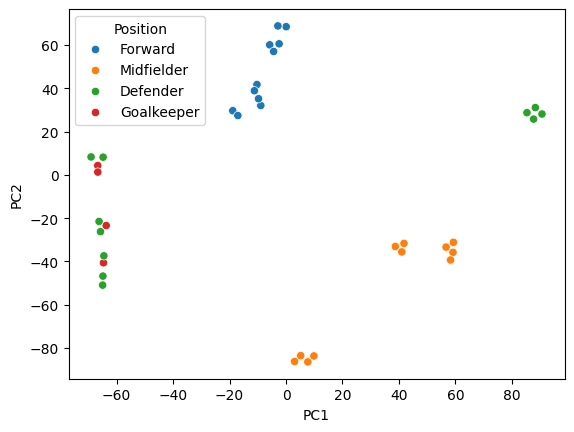

In [226]:
# prompt: Plot tSNE

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto',
             init='random', perplexity=3)
tsne_results = tsne.fit_transform(df_hw_standardized)

# Create a DataFrame from the results
df_tsne = pd.DataFrame(data=tsne_results, columns=['PC1', 'PC2'])

# Add labels to the DataFrame
df_tsne['Position'] = df_frame['Position']

# Plot the results
sns.scatterplot(x="PC1", y="PC2", hue="Position", data=df_tsne)
plt.show()


In [234]:
# prompt: Plot 3D for tSNE

fig = px.scatter_3d(df_tsne, x="PC1", y="PC2", z="Position", color="Position",
                 title="3D Scatter Plot of NBA Player Height, Weight, and Position")
fig.show()


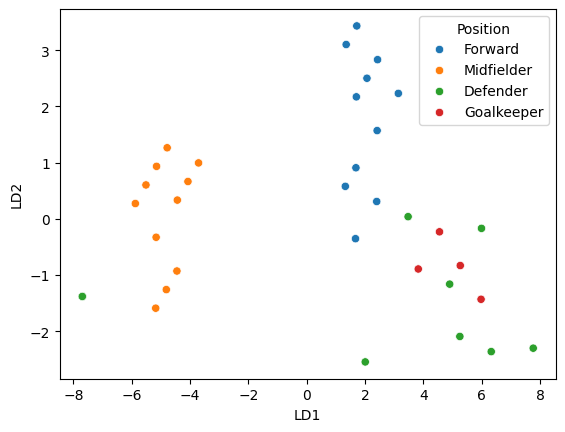

In [246]:
# prompt: Plot LDA  chart

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the data
lda.fit(df_hw_frame, df_frame['Position'])

# Transform the data
X_lda = lda.transform(df_hw_frame)

# Create a DataFrame from the transformed data
df_lda = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])

# Add labels to the DataFrame
df_lda['Position'] = df_frame['Position']

# Plot the results
sns.scatterplot(x="LD1", y="LD2", hue="Position", data=df_lda)
plt.show()


In [247]:
# prompt: plot 3 d for the chart above

fig = px.scatter_3d(df_lda, x="LD1", y="LD2", z="Position", color="Position",
                 title="3D Scatter Plot of NBA Player Height, Weight, and Position")
fig.show()


# K-Nearest Neighbors
Let's use the existing NBA player data to try to classify player positions based on height and weight.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = 4  # How many neighbours to use

In [197]:
df_neigh = KNeighborsClassifier(n_neighbors=n)
df_neigh.fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])
df_neigh_predictions = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
df_neigh_predictions

array(['Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward', 'Midfielder', 'Defender',
       'Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward',
       'Midfielder', 'Defender', 'Forward'], dtype=object)

Now we can try it on a few possible players.

In [198]:
Andy = pd.DataFrame([{'Shots':12,'Goals':3}]) #He isn't in the dataset)
Andy = scaler.transform(Andy)
print(df_neigh.predict(Andy))

['Defender']


In [199]:
Matthew = pd.DataFrame([{'Shots':76,'Goals':205}])  #I've definitely never played
Matthew = scaler.transform(Matthew)
print(df_neigh.predict(Matthew))

['Forward']


In [201]:
df_frame[df_frame['Name'] == 'David Johnson']

,Name,Height (cm),Weight (kg),Position,Goals,Shots,Nationality,Age,Assists,Pass Accuracy (%),...,Successful Tackles (%),Blocks,Errors Leading to Goal,Penalties Won,Penalties Conceded,Aerial Duels Won,Aerial Duels Lost,Long Balls,Free Kicks,cluster_labels_kmeans


# Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
df_gnb = GaussianNB().fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])

In [205]:
from sklearn.naive_bayes import GaussianNB
DF_gnb = GaussianNB().fit(df_hw_standardized[['Goals','Shots']],df_frame['Position'])

In [207]:
print(df_gnb.predict(Andy))

['Defender']


In [208]:
print(df_gnb.predict(Matthew))

['Forward']


# Evaluating Classification Performance
There are a number of scores and plots that we can compute or generate to evaluate classification results. We will introduce the following techniques:
- Accuracy
- Precision
- Recall
- F1 score
- Confusion Matrix

First, lets try actually getting a test sample.

In [209]:
# prompt: Generate accuracy score for the model

from sklearn.metrics import accuracy_score
y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
acc = accuracy_score(df_frame['Position'], y_pred)
print(acc)


1.0


In [211]:
# prompt: Generate precision score for the model

from sklearn.metrics import precision_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
precision = precision_score(df_frame['Position'], y_pred, average='weighted')
print(precision)


1.0


In [213]:
# prompt: Generate recall score for the model

from sklearn.metrics import recall_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
recall = recall_score(df_frame['Position'], y_pred, average='weighted')
print(recall)


1.0


In [214]:
# prompt: Generate FC1 score for the model

from sklearn.metrics import f1_score

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
f1 = f1_score(df_frame['Position'], y_pred, average='weighted')
print(f1)


1.0


In [216]:
# prompt: Compute the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = df_neigh.predict(df_hw_standardized[['Goals','Shots']])
confusion_matrix = confusion_matrix(df_frame['Position'], y_pred)
print(confusion_matrix)


[[11  0  0  0]
 [ 0 12  0  0]
 [ 0  0  4  0]
 [ 0  0  0 11]]


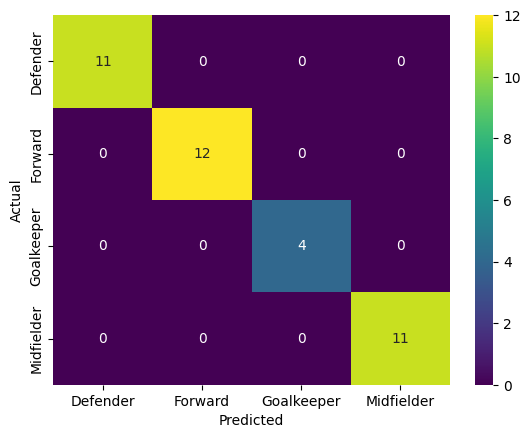

In [217]:
# prompt: Visualize the confusion matrix table above

import pandas as pd
import seaborn as sns

# Create the confusion matrix
confusion_matrix = pd.crosstab(df_frame['Position'], y_pred, rownames=['Actual'], colnames=['Predicted'])

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap="viridis", fmt="d")
plt.show()
